消融研究实验

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# path = 'METRLA/MoESoft-ablation-STSTST'
path = 'NYCBike1/MoESoft-layers-num'
file_path = f'./{path}/results.csv'
fig_title = f'{path}'
data = pd.read_csv(file_path)

# 去除列名中的空格
data.columns = data.columns.str.strip()
# 将分类名提取为列表
variants = data['Category'].tolist()
variants

[1, 2, 3, 4]

In [21]:
mae_list = []
rmse_list = []
mape_list = []
for index, row in data.iterrows():
    mae_list.append(row['MAE'])
    rmse_list.append(row['RMSE'])
    mape_list.append(float(row['MAPE'].strip().rstrip('%')))

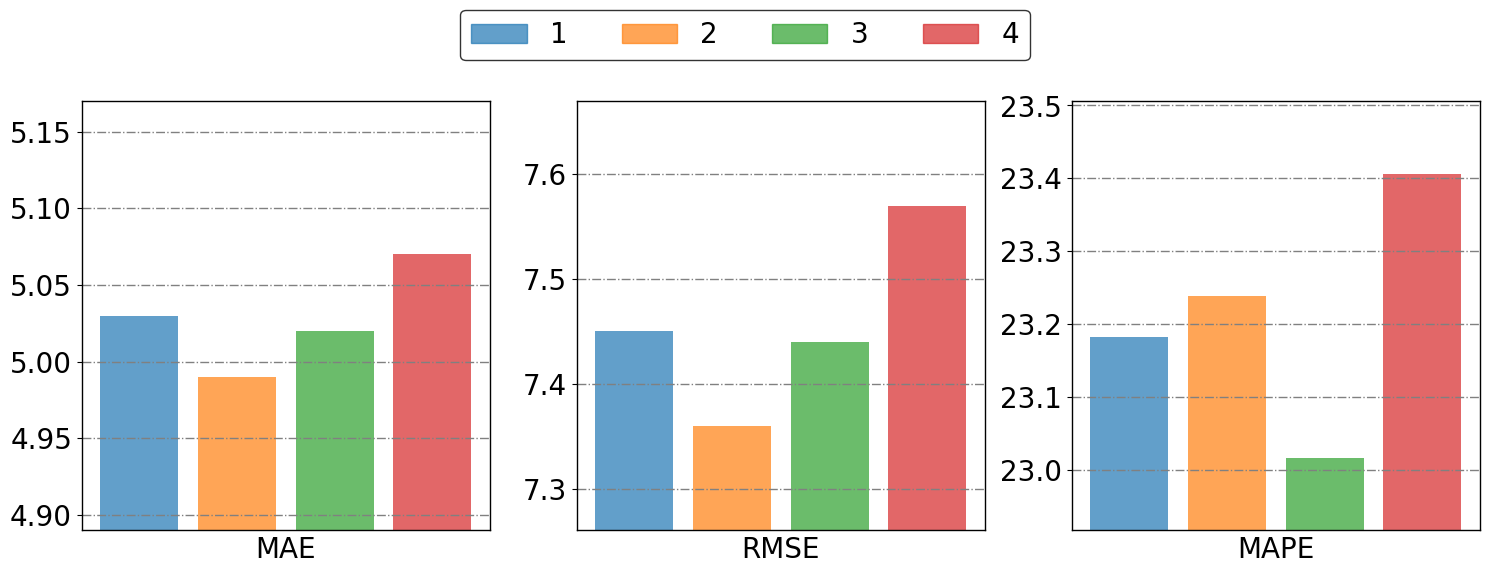

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 定义颜色字典，从色板中选择颜色
cmap = plt.get_cmap('tab10')
colors = {variant: cmap(i) for i, variant in enumerate(variants)}
font_size = 20

# 画条形图
for i, metric in enumerate([mae_list, rmse_list, mape_list]):
    axs[i].grid(True, linestyle='-.', linewidth=1.0, color='gray', axis='y', zorder=0)
    axs[i].bar(variants, metric, color=[colors[v] for v in variants], alpha=0.7, zorder=1)
    axs[i].set_xlabel(['MAE', 'RMSE', 'MAPE'][i], fontsize=font_size)
    axs[i].tick_params(axis='x', length=0)
    axs[i].set_xticks([])
    axs[i].tick_params(axis='y', labelsize=font_size)
    axs[i].set_ylim([min(metric) - 0.1, max(metric) + 0.1])
    # 设置图表外框线加粗
    for axis in ['top','bottom','left','right']:
        axs[i].spines[axis].set_linewidth(1.0)

legend_labels = [f'${v}$' for v in variants]
handles = [plt.Rectangle((0,0),1,1, color=colors[v], alpha=0.7) for v in variants]
# 美化图例框
legend = fig.legend(handles, legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.01), fontsize=font_size, ncol=len(variants), frameon=True)
legend.get_frame().set_edgecolor('black')  # 设置图例边框颜色
legend.get_frame().set_linewidth(1.0)  # 设置图例边框宽度

plt.tight_layout()
# plt.savefig('hyper1.pdf', format='pdf', bbox_inches='tight')
# plt.show()